In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from ar6_ch6_rcmipfigs import constants

%load_ext autoreload
%autoreload 2

from ar6_ch6_rcmipfigs.constants import INPUT_DATA_DIR

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


In [3]:
first_y = 1750
last_y = 2100

**Set reference year for temperature change:**

In [4]:
ref_year = 2020

# Code + figures

In [5]:
fn_uncertainty = INPUT_DATA_DIR /'chris_slcf_warming_ranges.csv'
df_uncertainty = pd.read_csv(fn_uncertainty, index_col=0)#.set_index('id')

# make sure base period/ref period are the same:
df_uncertainty = df_uncertainty[df_uncertainty['base_period']==int(ref_year)]
df_uncertainty#['scenario']#.uniqu
#diff_uncertainty = df_uncertainty - df_uncertainty['p50']

,scenario,forcing,base_period,year,p05,p16,p50,p84,p95
0,ssp119,ch4,2020,2020,0.000000,0.000000,0.000000,0.000000,0.000000
1,ssp119,ch4,2020,2021,0.001266,0.001475,0.001859,0.002378,0.002767
2,ssp119,ch4,2020,2022,0.002245,0.002638,0.003392,0.004398,0.005168
3,ssp119,ch4,2020,2023,0.002916,0.003463,0.004565,0.006049,0.007151
4,ssp119,ch4,2020,2024,0.003252,0.003953,0.005340,0.007207,0.008723
...,...,...,...,...,...,...,...,...,...
6232,ssp585,anthro,2020,2096,2.437122,2.772979,3.416691,4.215365,4.876034
6233,ssp585,anthro,2020,2097,2.467945,2.808497,3.460478,4.273505,4.942096
6234,ssp585,anthro,2020,2098,2.497630,2.842573,3.503622,4.330887,5.006969
6235,ssp585,anthro,2020,2099,2.526265,2.877141,3.547548,4.387970,5.070724


## Renaming to fit conventions:

#### variables:


    'ch4',
    'aerosol-total',
    'o3',
    'HFCs',
    'bc_on_snow']

In [6]:
dic_vars = dict(
    hfc='HFCs', 
    o3='o3',
    slcf='Sum SLCF (Aerosols, Methane, Ozone, HFCs)',
    aerosol='aerosol-total',
    anthro='total_anthropogenic'
)
dic_cols = dict(
    forcing='variable',
    
)

In [7]:
df_uncertainty['forcing'] = df_uncertainty['forcing'].replace(dic_vars)#.unique()
df_uncertainty = df_uncertainty.rename(dic_cols, axis=1)

In [8]:
percentiles =['p05','p16','p50','p84','p95']

In [9]:
ds = df_uncertainty.set_index(['scenario','variable','year', 'base_period']).to_xarray()

ds

<xarray.Dataset>
Dimensions:      (base_period: 1, scenario: 11, variable: 7, year: 81)
Coordinates:
  * scenario     (scenario) object 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * variable     (variable) object 'HFCs' ... 'total_anthropogenic'
  * year         (year) int64 2020 2021 2022 2023 2024 ... 2097 2098 2099 2100
  * base_period  (base_period) int64 2020
Data variables:
    p05          (scenario, variable, year, base_period) float64 0.0 ... 2.555
    p16          (scenario, variable, year, base_period) float64 0.0 ... 2.913
    p50          (scenario, variable, year, base_period) float64 0.0 ... 3.59
    p84          (scenario, variable, year, base_period) float64 0.0 ... 4.445
    p95          (scenario, variable, year, base_period) float64 0.0 ... 5.136

In [10]:
ds.variable

<xarray.DataArray 'variable' (variable: 7)>
array(['HFCs', 'Sum SLCF (Aerosols, Methane, Ozone, HFCs)', 'aerosol-total',
       'bc_on_snow', 'ch4', 'o3', 'total_anthropogenic'], dtype=object)
Coordinates:
  * variable  (variable) object 'HFCs' ... 'total_anthropogenic'

In [11]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'

PATH_DT_TAB_OUTPUT = RESULTS_DIR / 'tables' / 'table_sens_dT_cs_recommandetion.csv'
PATH_DT_OUTPUT = OUTPUT_DATA_DIR / 'dT_uncertainty_data_FaIR_chris.nc'

**Output table found in:**

In [12]:
print(PATH_DT_OUTPUT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_uncertainty_data_FaIR_chris.nc


## Imports:

In [13]:
import xarray as xr
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'
percentile = 'percentile'

## Set values:

ECS parameters:

Year to integrate from and to:

In [15]:
first_y = '1750'
last_y = '2100'

**Set reference year for temperature change:**

**Years to output change in**

In [16]:
years = ['2040', '2100']

In [17]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

# PATH_DATASET = OUTPUT_DATA_DIR + '/forcing_data_rcmip_models.nc'
# PATH_DT = OUTPUT_DATA_DIR / '/dT_data_rcmip_models.nc'
PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP_recommendation.nc'

In [18]:
ds_DT = xr.open_dataset(PATH_DT)

In [19]:
ds_DT['variable']#.scenario  # .climatemodel

<xarray.DataArray 'variable' (variable: 19)>
array(['co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric',
       'contrails', 'aerosol-radiation_interactions',
       'aerosol-cloud_interactions', 'bc_on_snow', 'land_use', 'volcanic',
       'solar', 'total_anthropogenic', 'total_natural', 'total',
       'aerosol-total', 'aerosol-total-with_bc-snow', 'HFCs'], dtype=object)
Coordinates:
  * variable  (variable) object 'co2' 'ch4' ... 'HFCs'

In [20]:
ds

<xarray.Dataset>
Dimensions:      (base_period: 1, scenario: 11, variable: 7, year: 81)
Coordinates:
  * scenario     (scenario) object 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * variable     (variable) object 'HFCs' ... 'total_anthropogenic'
  * year         (year) int64 2020 2021 2022 2023 2024 ... 2097 2098 2099 2100
  * base_period  (base_period) int64 2020
Data variables:
    p05          (scenario, variable, year, base_period) float64 0.0 ... 2.555
    p16          (scenario, variable, year, base_period) float64 0.0 ... 2.913
    p50          (scenario, variable, year, base_period) float64 0.0 ... 3.59
    p84          (scenario, variable, year, base_period) float64 0.0 ... 4.445
    p95          (scenario, variable, year, base_period) float64 0.0 ... 5.136

In [21]:
from ar6_ch6_rcmipfigs.utils.plot import get_scenario_c_dic, \
    get_scenario_ls_dic

# scenario colors and linestyle
cdic = get_scenario_c_dic()
lsdic = get_scenario_ls_dic()  # get_ls_dic(ds_DT[climatemodel].values)

<IPython.core.display.Javascript object>

hallo


In [22]:
scenario
scenarios_fl = ['ssp119',
                'ssp126',
                'ssp245',
                'ssp370',
                'ssp370-lowNTCF-aerchemmip',
                'ssp370-lowNTCF-gidden',
                'ssp585']

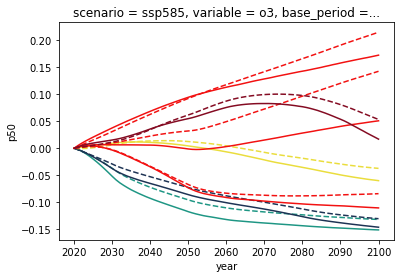

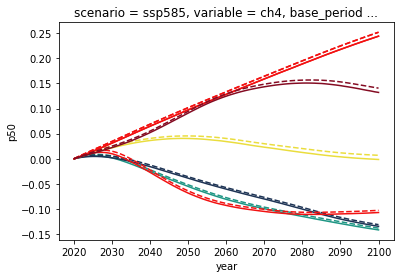

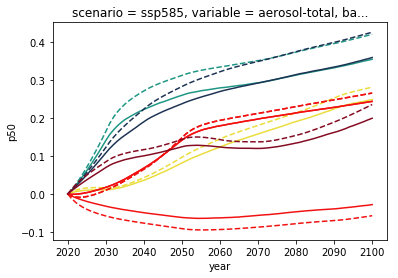

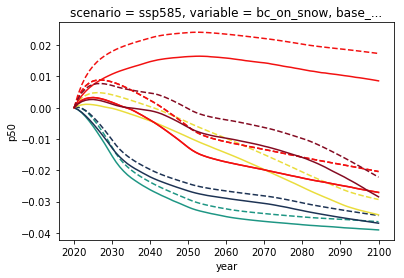

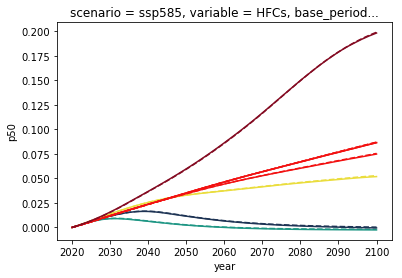

In [23]:

for var in ['o3','ch4','aerosol-total','bc_on_snow','HFCs']:
    for scn in scenarios_fl:
        pl_da = ds_DT['Delta T'].sel(variable=var, year=slice(2020,2100), scenario=scn, percentile='recommendation')-ds_DT['Delta T'].sel(variable=var, year=2020, scenario=scn, percentile='recommendation')

        pl_da.plot(linestyle = 'dashed', label=scn, c=cdic[scn])
        
        pl_da = ds['p50'].sel(variable=var, year=slice(2020,2100), scenario=scn)#, percentile='recommendation')
        pl_da.plot(linestyle = 'solid', label=scn, c=cdic[scn])
    plt.show()

## Make difference and save:

In [24]:
p50= 'p50'
for perc in percentiles:
    nvn = f'{perc}-p50'
    ds[nvn] = ds[perc] -ds[p50]
    print(nvn)
ds

p05-p50
p16-p50
p50-p50
p84-p50
p95-p50


<xarray.Dataset>
Dimensions:      (base_period: 1, scenario: 11, variable: 7, year: 81)
Coordinates:
  * scenario     (scenario) object 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * variable     (variable) object 'HFCs' ... 'total_anthropogenic'
  * year         (year) int64 2020 2021 2022 2023 2024 ... 2097 2098 2099 2100
  * base_period  (base_period) int64 2020
Data variables:
    p05          (scenario, variable, year, base_period) float64 0.0 ... 2.555
    p16          (scenario, variable, year, base_period) float64 0.0 ... 2.913
    p50          (scenario, variable, year, base_period) float64 0.0 ... 3.59
    p84          (scenario, variable, year, base_period) float64 0.0 ... 4.445
    p95          (scenario, variable, year, base_period) float64 0.0 ... 5.136
    p05-p50      (scenario, variable, year, base_period) float64 0.0 ... -1.035
    p16-p50      (scenario, variable, year, base_period) float64 0.0 ... -0.6765
    p50-p50      (scenario, variable, year, base_period) float64 0.0 0.0 ... 0.0
    p84-p50      (scenario, variable, year, base_period) float64 0.0 ... 0.8557
    p95-p50      (scenario, variable, year, base_period) float64 0.0 ... 1.546

In [25]:
PATH_DT_OUTPUT

PosixPath('/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_uncertainty_data_FaIR_chris.nc')

In [26]:
ds.to_netcdf(PATH_DT_OUTPUT)